In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shopping_df = pd.read_csv('data/sdu.csv')
shopping_df.head()
shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [65]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\Windows\Fonts\\YTTE08.TTF' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties (fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용

plt.rc('axes', unicode_minus=False)

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\TJ\AppData\Local\Temp\ipykernel_8008\972888335.py:5: SyntaxWarning: invalid escape sequence '\W'
  font_path = 'C:\Windows\Fonts\\YTTE08.TTF' # 윈도우 OS 폰트 경로


In [4]:
shopping_df['Age'].max()
shopping_df['Gender']
shopping_df['Purchase Amount (USD)'].sum()

np.int64(233081)

In [5]:
max_age = shopping_df['Age'].max()
shopping_df['AgeGroup'] = pd.cut(shopping_df['Age'],
       bins = [0, 10, 20, 30, 40, 50, 60, max_age],
       labels=['0~10', '10~20', '20~30', '30~40', '40~50', '50~60', '70~'],
       right=False)

shopping_df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,AgeGroup
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,50~60
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,10~20
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,50~60
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,20~30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,40~50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,40~50
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,50~60
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,40~50
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,40~50


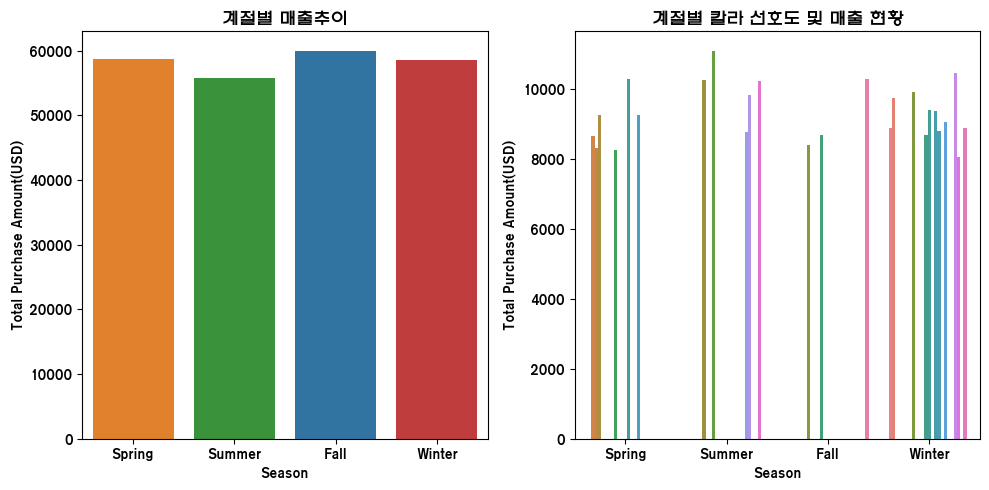

In [70]:
# Gender별 매출액
# Color별 매출액

fig, ax = plt.subplots(1,2, figsize=(10, 5))

order = [ 'Spring','Summer', 'Fall', 'Winter']


season_totals_df = shopping_df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
season_totals_df.columns = ['Season', 'Total Purchase Amount(USD)']

sns.barplot(season_totals_df, 
            x='Season', 
            y='Total Purchase Amount(USD)',
            hue='Season', 
            order=order,
            ax=ax[0])

color_total_df = shopping_df.groupby('Color')['Purchase Amount (USD)'].sum().reset_index()
color_total_df.columns = ['Color', 'Total Purchase Amount(USD)']

sns.barplot(data=color_total_df, 
            x=shopping_df['Season'],             
            y='Total Purchase Amount(USD)',
            hue='Color',
            order=order, 
            ax=ax[1])

ax[1].legend().set_visible(False)

ax[0].set_title('계절별 매출추이')
ax[1].set_title('계절별 칼라 선호도 및 매출 현황')

plt.tight_layout()
plt.show()

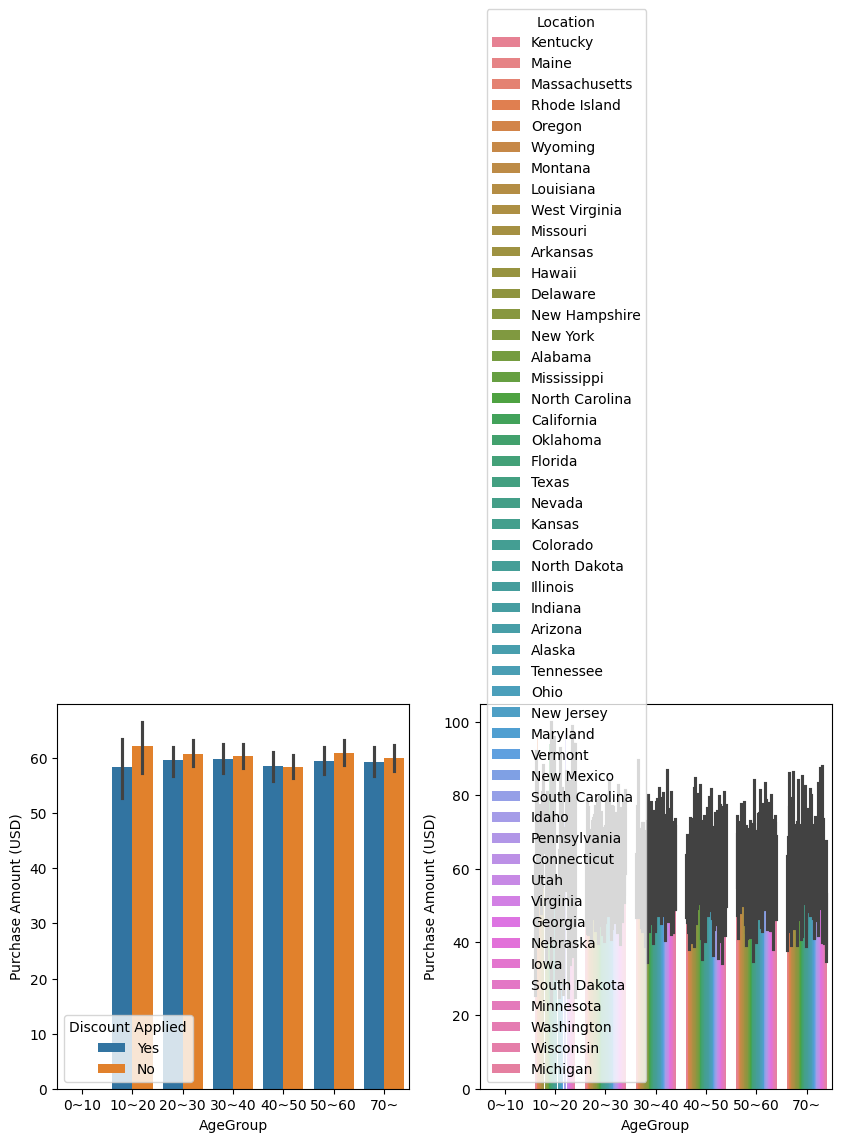

In [6]:
# Discount별 매출액
# Location별 매출액

fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.barplot(data=shopping_df, 
            x=shopping_df['AgeGroup'], 
            y=shopping_df['Purchase Amount (USD)'],
            hue=shopping_df['Discount Applied'], 
            ax=ax[0])

sns.barplot(data=shopping_df, 
            x=shopping_df['AgeGroup'], 
            y=shopping_df['Purchase Amount (USD)'],
            hue=shopping_df['Location'], 
            ax=ax[1])


plt.show()

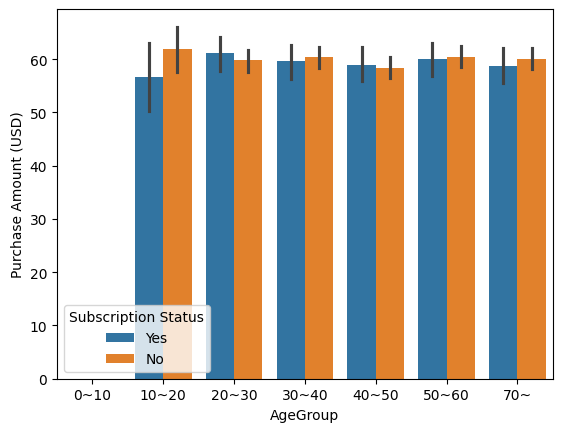

In [7]:
# Subscription Status별 매출액

sns.barplot(data=shopping_df, 
            x=shopping_df['AgeGroup'], 
            y=shopping_df['Purchase Amount (USD)'],
            hue=shopping_df['Subscription Status'] 
            )

plt.show()

<Axes: xlabel='Age', ylabel='Purchase Amount (USD)'>

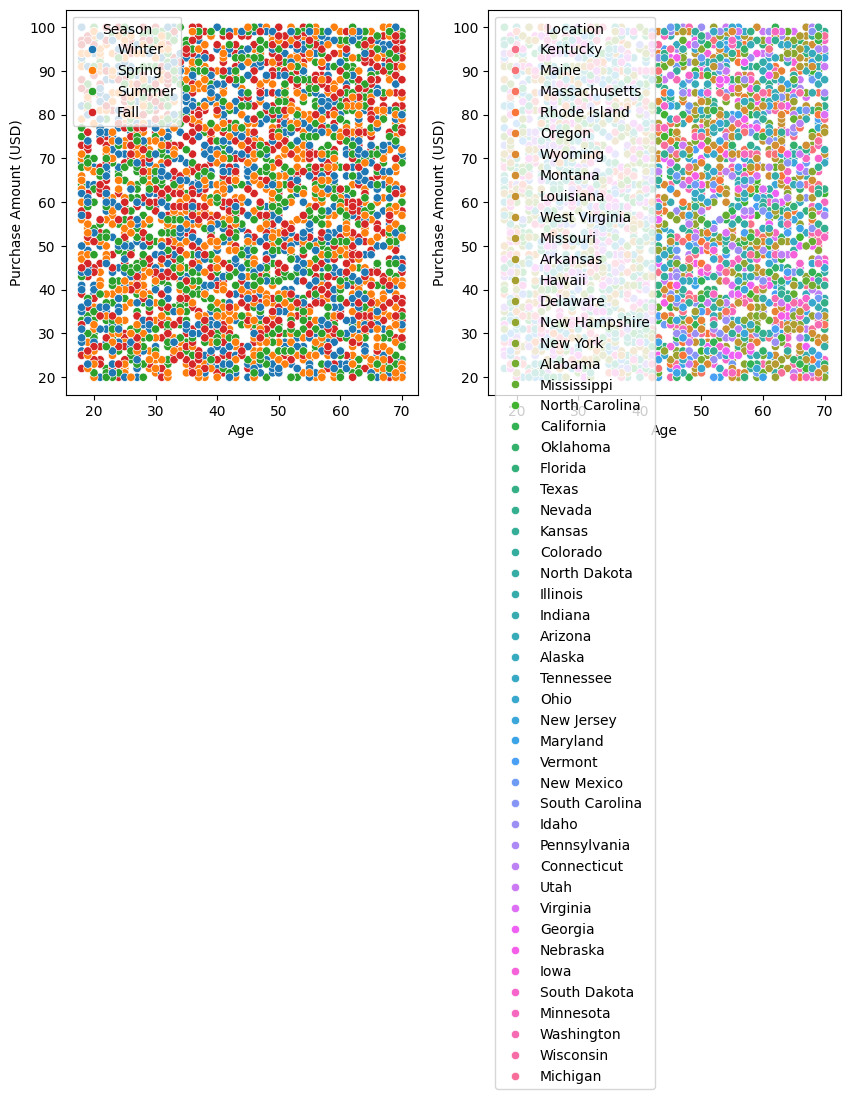

In [8]:
# 나이 분포도 (scatterplot)
# Season별, Location별

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=shopping_df, x='Age', y='Purchase Amount (USD)',
                hue='Season',
                ax=ax[0])

sns.scatterplot(data=shopping_df, x='Age', y='Purchase Amount (USD)',
                hue='Location',
                ax=ax[1])

In [12]:
!pip install wordcloud

'Blouse Sweater Jeans Sandals Blouse Sneakers Shirt Shorts Coat Handbag Shoes Shorts Coat Dress Coat Skirt Sunglasses Dress Sweater Pants Pants Pants Pants Pants Jacket Hoodie Jewelry Shorts Handbag Dress Jewelry Dress Jacket Pants T-shirt Blouse T-shirt Jeans Dress Pants Handbag Scarf Coat Scarf Hat Socks Shirt Jewelry Shirt Hoodie Blouse Skirt T-shirt Skirt Coat Jacket Backpack Coat Hoodie Belt Sweater Scarf Sneakers Sunglasses Boots Backpack Blouse Coat Handbag Belt Belt Dress Dress Pants Gloves Scarf Hat Dress Skirt Jacket Sandals Shoes Pants Dress Coat Sunglasses Hoodie Shoes T-shirt Jacket Hat Scarf Jacket Sweater Skirt Sneakers Gloves Shoes Jeans Hoodie Sunglasses Coat Socks Boots Sunglasses Backpack Jacket Sneakers Socks T-shirt Backpack Belt Gloves Hat Coat Skirt Shoes Sandals Sweater Coat Hat Shorts Backpack Sweater Sweater Shorts Shorts Sweater Scarf Dress Scarf Skirt Backpack Sweater Hat Sandals Blouse Sneakers Skirt Coat Shirt Gloves Jacket Coat Shoes Jewelry Skirt Shoes G

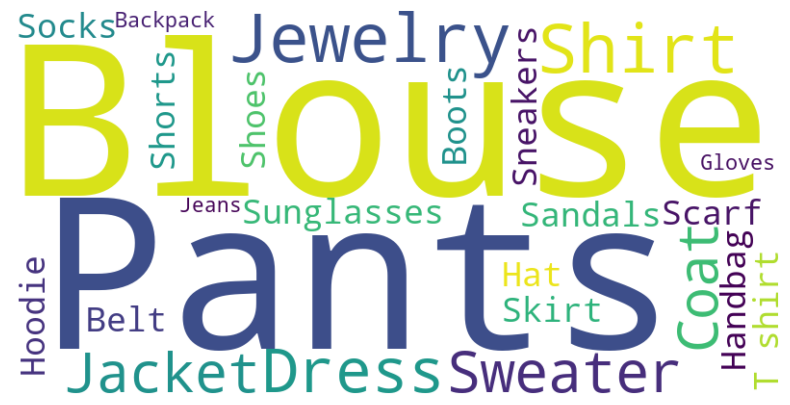

In [9]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(shopping_df['Item Purchased'].astype(str))
display(text)

wc = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis'
).generate(text)

wc.to_file('data/sdu_img.png')

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



In [14]:
!pip install folium

In [10]:
shopping_df['Location'].count()

np.int64(3900)

In [11]:
!pip install geopy

In [ ]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

location_series = shopping_df['Location']
location_list = location_series.tolist()

location_text = " ".join(shopping_df['Location'])

geolocator = Nominatim(user_agent='geo-app')

converted_location = []

for state_name in location_list:
    try:
        location = geolocator.geocode(state_name)
        
        if location: 
            latitude = location.latitude
            longitude = location.longitude
            
            converted_location.append([latitude, longitude])
        
        print(f'{state_name}: 변환 완료')
    except: 
        print(f'{state_name}: 좌표 변환 실패')

print(converted_location)

Kentucky: 변환 완료
Maine: 변환 완료
Massachusetts: 변환 완료
Rhode Island: 변환 완료
Oregon: 변환 완료
Wyoming: 변환 완료
Montana: 변환 완료
Louisiana: 변환 완료
West Virginia: 변환 완료
Missouri: 변환 완료
Arkansas: 변환 완료
Hawaii: 변환 완료
Delaware: 변환 완료
New Hampshire: 변환 완료
New York: 변환 완료
Rhode Island: 변환 완료
Alabama: 변환 완료
Mississippi: 변환 완료
Montana: 변환 완료
Rhode Island: 변환 완료
Louisiana: 변환 완료
North Carolina: 변환 완료
California: 변환 완료
Oklahoma: 변환 완료
Florida: 변환 완료
Texas: 변환 완료
Nevada: 변환 완료
Kentucky: 변환 완료
North Carolina: 변환 완료
Wyoming: 변환 완료
North Carolina: 변환 완료
West Virginia: 변환 완료
Kansas: 변환 완료
Colorado: 변환 완료
North Dakota: 변환 완료
Massachusetts: 변환 완료
Illinois: 변환 완료
Indiana: 변환 완료
Florida: 변환 완료
Arizona: 변환 완료
Louisiana: 변환 완료
Alaska: 변환 완료
Tennessee: 변환 완료
Ohio: 변환 완료
Kentucky: 변환 완료
Tennessee: 변환 완료
California: 변환 완료
Montana: 변환 완료
Nevada: 변환 완료
New Jersey: 변환 완료
Maryland: 변환 완료
Vermont: 변환 완료
Alaska: 변환 완료
Mississippi: 변환 완료
New Mexico: 변환 완료
South Carolina: 변환 완료
Mississippi: 변환 완료
West Virginia: 변환 완료
Missouri: 변환 완료

In [ ]:
from folium.plugins import MarkerCluster

center_location = converted_location[0]
icon_color = 'blue'

map = folium.Map(location=center_location, # [위도, 경도]
                 zoom_start=15,
                 control_scale = True, # scale bar 표시 여부
                 tiles='OpenStreetMap' # 배경 지도 스타일 지정 (기본값 OpenStreetMap) CartoDB dark_matter' 검은색
                 ) 

marker_cluster = MarkerCluster().add_to(map)

for lat, lon in converted_location:
    folium.Marker(
                [lat, lon],
                icon=folium.Icon(color=icon_color)   
                ).add_to(marker_cluster)       
  
map.save('data/map.html')
map

In [26]:
agg = shopping_df.groupby('Location')['Gender'].count()
agg

Location
Alabama           89
Alaska            72
Arizona           65
Arkansas          79
California        95
Colorado          75
Connecticut       78
Delaware          86
Florida           68
Georgia           79
Hawaii            65
Idaho             93
Illinois          92
Indiana           79
Iowa              69
Kansas            63
Kentucky          79
Louisiana         84
Maine             77
Maryland          86
Massachusetts     72
Michigan          73
Minnesota         88
Mississippi       80
Missouri          81
Montana           96
Nebraska          87
Nevada            87
New Hampshire     71
New Jersey        67
New Mexico        81
New York          87
North Carolina    78
North Dakota      83
Ohio              77
Oklahoma          75
Oregon            74
Pennsylvania      74
Rhode Island      63
South Carolina    76
South Dakota      70
Tennessee         77
Texas             77
Utah              71
Vermont           85
Virginia          77
Washington        73
West

In [29]:
import folium
from folium.plugins import MarkerCluster

# 예시 데이터 (같은 위치에 중복 마커)
locations = [
    [37.5665, 126.9780],
    [37.5665, 126.9780],
    [37.5665, 126.9780],
    [37.5700, 126.9800],
    [37.5700, 126.9800]
]

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# MarkerCluster 그룹 생성
marker_cluster = MarkerCluster().add_to(m)

# 마커 추가
for loc in locations:
    folium.Marker(location=loc).add_to(marker_cluster)

# 지도를 HTML 파일로 저장
m.save('markercluster_with_overlap.html')

m
